### Iris data exercise

In [1]:
# Importing the libraries
import pandas as pd 

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the iris data and store it as dataframe
iris_data = load_iris()

data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Loading the target data if needed
# data['flower'] = iris_data.target
# data.head()

In [4]:
# Dropping the sepal length and sepal width for making the model simple
data.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)

In [5]:
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


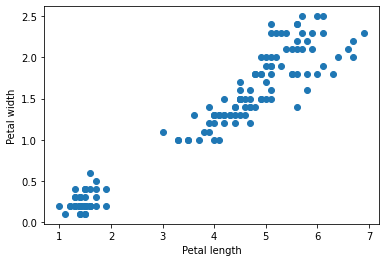

In [6]:
# Plotting the data to have an idea about the clusters
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [7]:
# Applying KMeans clustering to data with 3 clusters
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(data[['petal length (cm)','petal width (cm)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
# Adding the cluster to the data
data['cluster'] = y_pred
data.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


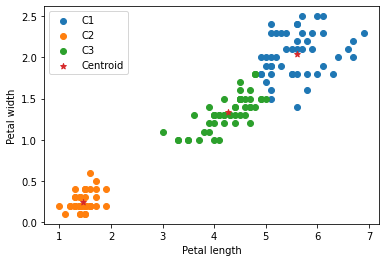

In [9]:
# Dividng and plotting the graph of three clusters with the centroid
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]

plt.scatter(c1['petal length (cm)'],c1['petal width (cm)'], label= 'C1')
plt.scatter(c2['petal length (cm)'],c2['petal width (cm)'], label= 'C2')
plt.scatter(c3['petal length (cm)'],c3['petal width (cm)'], label= 'C3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], label = 'Centroid', marker='*')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

### Pre-processing with Min-Max Scaler

In [10]:
scaler = MinMaxScaler()

scaler.fit(data[['petal length (cm)']])
data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])

scaler.fit(data[['petal width (cm)']])
data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])

In [11]:
data.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


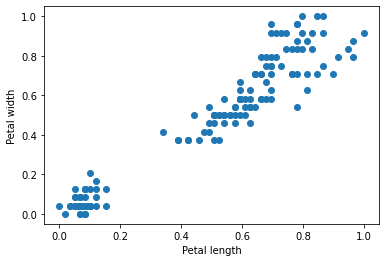

In [12]:
# Plotting the graph after scaling
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

### Elbow method

In [13]:
# Finding the optimal value k by running the KMeans to K clusters
k_cluster = range(1,10)
sum_squared_error = []
for k in k_cluster:
    km = KMeans(n_clusters=k)
    km.fit(data[['petal length (cm)', 'petal width (cm)']])
    sum_squared_error.append(km.inertia_)    

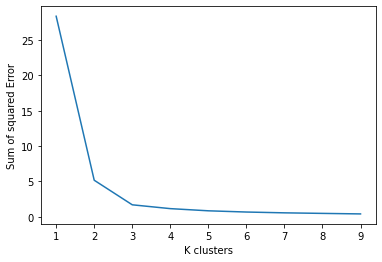

In [14]:
# Plotting the graph against Sum of square errors Vs clusters 
plt.xlabel('K clusters')
plt.ylabel('Sum of squared Error')
plt.plot(k_cluster,sum_squared_error)
plt.show()